Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


Load Ratings Data

In [2]:
ratings = pd.read_csv(
    "../data/raw/u.data",
    sep="\t",
    names=["user_id", "item_id", "rating", "timestamp"]
)

ratings.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Load Movie Metadata

In [3]:
movies = pd.read_csv(
    "../data/raw/u.item",
    sep="|",
    encoding="latin-1",
    header=None,
    usecols=[0, 1],
    names=["item_id", "movie_title"]
)

movies.head()


,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Dataset Overview

In [4]:
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

print("\nRatings Info:")
ratings.info()

print("\nMissing values:")
ratings.isnull().sum()


Ratings shape: (100000, 4)
Movies shape: (1682, 2)

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Missing values:


user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Rating Distribution

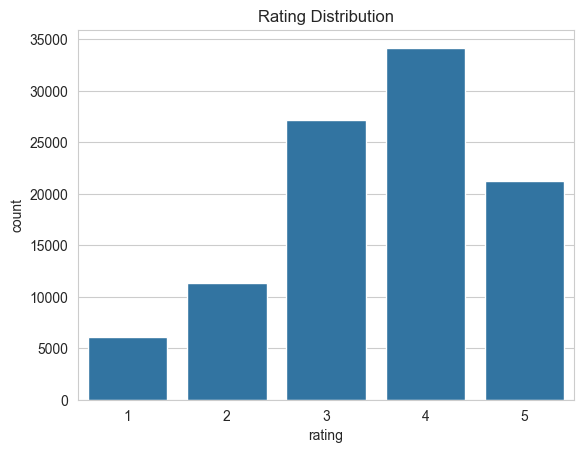

In [5]:
plt.figure()
sns.countplot(x="rating", data=ratings)
plt.title("Rating Distribution")
plt.show()


Number of Ratings per User

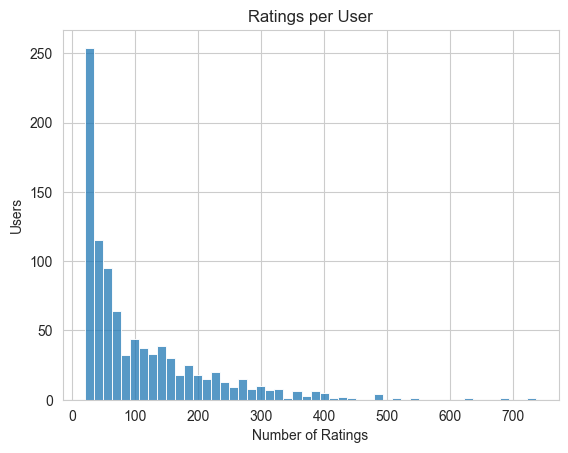

In [6]:
ratings_per_user = ratings.groupby("user_id")["rating"].count()

plt.figure()
sns.histplot(ratings_per_user, bins=50)
plt.title("Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Users")
plt.show()


Number of Ratings per Movie

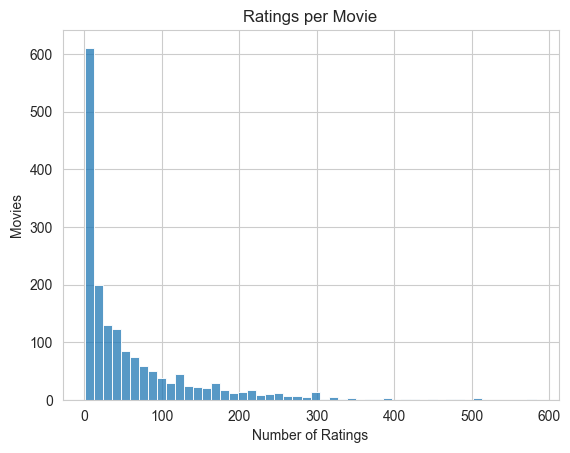

In [7]:
ratings_per_movie = ratings.groupby("item_id")["rating"].count()

plt.figure()
sns.histplot(ratings_per_movie, bins=50)
plt.title("Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Movies")
plt.show()


User–Item Interaction Matrix

In [8]:
user_item_matrix = ratings.pivot(
    index="user_id",
    columns="item_id",
    values="rating"
)

user_item_matrix.head()


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sparsity Calculation

In [9]:
num_ratings = len(ratings)
num_possible = user_item_matrix.shape[0] * user_item_matrix.shape[1]

sparsity = 1 - (num_ratings / num_possible)
print(f"Sparsity of User-Item Matrix: {sparsity:.2%}")


Sparsity of User-Item Matrix: 93.70%


Merge Ratings with Movie Names

In [10]:
ratings_movies = ratings.merge(movies, on="item_id")
ratings_movies.head()


,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
